In [1]:
import numpy as np
import random

In [2]:
p1 = np.array([1,1])
p2 = np.array([4,4])

In [3]:
np.sqrt(np.sum(np.power(p2-p1,2)))

4.242640687119285

In [4]:
def distance(p1, p2):
    """Find the euclidian distance between two vectors."""    
    return np.sqrt(np.sum(np.power(p2-p1,2)))


In [5]:
distance(p1,p2)

4.242640687119285

In [6]:
def majority_vote(votes):
    """Count the votes in an array"""
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    return vote_counts


In [7]:
votes = [1,2,3,1,2,3,3,3,3,3]
vote_counts = majority_vote(votes)
vote_counts

{1: 2, 2: 2, 3: 6}

In [8]:
max_count = max(vote_counts.values())
max_count

6

In [9]:
winners = []
for vote, count in vote_counts.items():
    if count == max_count:
        winners.append(vote)
winners

[3]

In [10]:
def majority_vote(votes):
    """return the most commom element in votes"""
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
            
    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
            
    return random.choice(winners)


In [11]:
votes = [3,3,3,2,2,2]
winner = majority_vote(votes)
winner

3

In [12]:
import scipy.stats as ss

In [13]:
def majority_vote_short(votes):
    """return the most commom element in votes"""
    mode, count = ss.mstats.mode(votes)
            
    return mode


In [14]:
votes = [3,3,3,2,2,2]
winner = majority_vote_short(votes)
winner

array([2.])

In [15]:
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p = np.array([2.5,2])

In [16]:
import matplotlib.pyplot as plt

(0.5, 3.5, 0.5, 3.5)

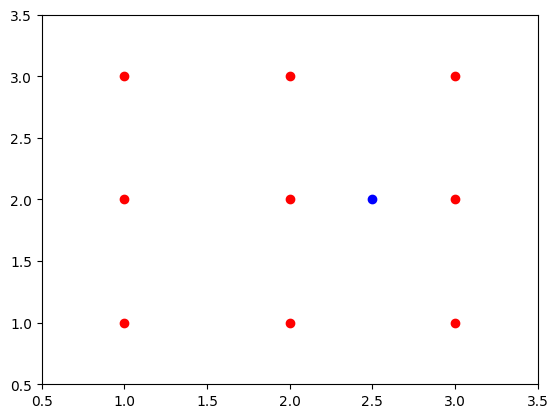

In [17]:
plt.plot(points[:,0], points[:,1], "ro")
plt.plot(p[0],p[1], "bo")
plt.axis([0.5,3.5,0.5,3.5])

In [18]:
distances = np.zeros(points.shape[0])
for i in range(len(distances)):
    distances[i] = distance(p,points[i])
    
distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [19]:
ind = np.argsort(distances)
ind

array([4, 7, 3, 5, 6, 8, 1, 0, 2])

In [20]:
distances[ind[0:2]]

array([0.5, 0.5])

In [21]:
def find_nearest_neighbors(p, points, k = 5):
    """Find the K nearest neighbors of point p and return theirs indices."""
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p,points[i])
    ind = np.argsort(distances)
    return ind[:k]

In [22]:
ind = find_nearest_neighbors(p, points, 3)
points[ind]

array([[2, 2],
       [3, 2],
       [2, 1]])

In [23]:
def knn_predict(p, points, outcomes,  k = 5):
    ind = find_nearest_neighbors(p, points,k)
    return majority_vote(outcomes[ind])

In [24]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])

In [25]:
knn_predict(np.array([2.5, 2.7]), points, outcomes, k=2)

1

In [26]:
knn_predict(np.array([1, 2.7]), points, outcomes, k=2)

0

In [27]:
n = 5
np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))), axis = 0)
outcomes = np.concatenate((np.repeat(0, n), np.repeat(1,n)) )


In [28]:
def generate_synth_data(n = 50):
    """Create two sets of points from bivariate normal distributions."""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1,n)) )
    return (points, outcomes)

In [29]:
n = 20
(points, outcomes) = generate_synth_data(n)

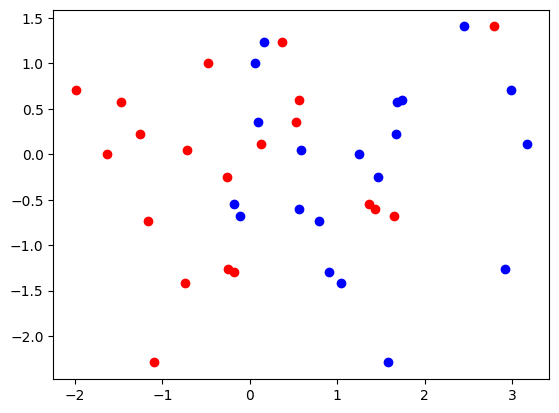

In [30]:
n = 20
plt.figure()
plt.plot(points[:n, 0], points[:n,1], "ro")
plt.plot(points[n:,0], points[:n, 1], "bo")
plt.savefig("bivariatedata.pdf")

In [31]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """Classify each point on the predition grid"""
    (x_min,x_max,y_min,y_max) = limits
    xs = np.arange(x_min, x_max,h)
    ys = np.arange(y_min, y_max,h)
    xx, yy = np.meshgrid(xs,ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
    return (xx, yy, prediction_grid)

In [32]:
seasons = ["spring", "summer", "fall", "winter"]
list(enumerate(seasons))

[(0, 'spring'), (1, 'summer'), (2, 'fall'), (3, 'winter')]

In [33]:
for ind, season in enumerate(seasons):
    print(ind, season)

0 spring
1 summer
2 fall
3 winter


In [34]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [35]:
(predictors, outcomes) = generate_synth_data()

In [36]:
predictors

array([[-0.29629639, -2.95080523],
       [ 0.11032983,  0.13931661],
       [-1.81468509, -0.65597011],
       [ 0.12622235,  0.90647098],
       [ 1.18744975, -0.8139974 ],
       [ 1.92722394,  0.38332217],
       [-0.43317356,  0.48969178],
       [-0.10200797,  1.03918711],
       [ 0.33678774, -3.54380209],
       [ 0.02039874,  1.13849628],
       [ 0.17712568,  0.35919825],
       [-0.45904349,  0.93951463],
       [ 0.7267769 ,  0.96603174],
       [ 1.55857284,  1.02763841],
       [ 1.08280663, -1.17381036],
       [-0.63779076, -0.20155616],
       [-0.23958819,  0.19318854],
       [-0.58803981,  0.61227834],
       [ 0.43279939, -1.62597326],
       [ 0.50960082,  0.42852206],
       [ 1.99822125, -0.32041588],
       [ 0.8087905 , -0.01951742],
       [-1.03224704,  0.16770397],
       [ 0.01119424,  0.93559204],
       [ 0.82110366,  1.29284234],
       [ 1.46875647,  1.72092237],
       [-0.70346937, -0.08703336],
       [-1.1537019 ,  0.19105391],
       [-0.46947607,

In [188]:
k = 5
filename = "knn_synth5.pdf"
limits = (-3,4,-3,4)
h = 0.1


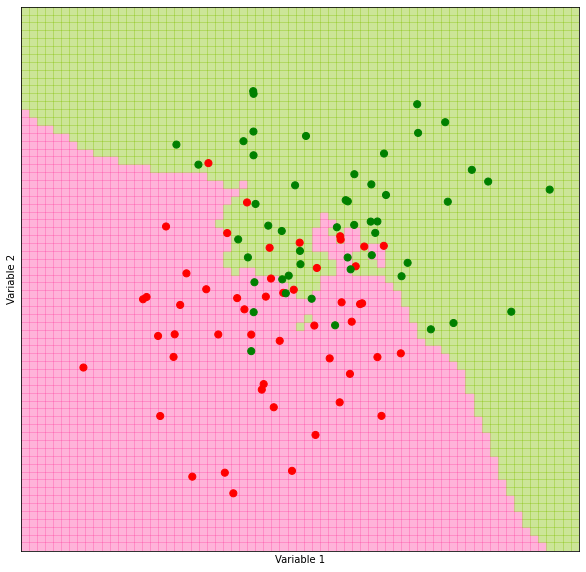

In [189]:
(xx,yy,prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h ,k)
plot_prediction_grid(xx,yy,prediction_grid, filename)

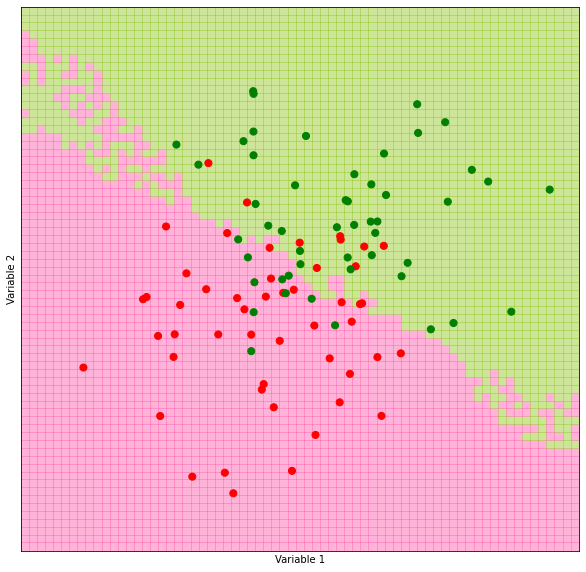

In [190]:
k = 50
filename = "knn_synth50.pdf"
limits = (-3,4,-3,4)
h = 0.1
(xx,yy,prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h ,k)
plot_prediction_grid(xx,yy,prediction_grid, filename)

In [194]:
from sklearn import datasets
iris = datasets.load_iris()
predictors = iris.data[:,0:2]
outcomes = iris.target

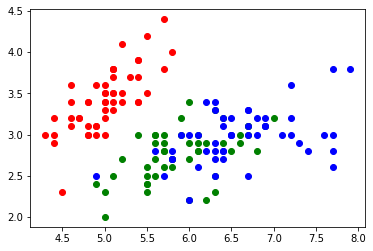

In [195]:
plt.plot(predictors[outcomes == 0][:,0],predictors[outcomes == 0][:,1], "ro")
plt.plot(predictors[outcomes == 1][:,0],predictors[outcomes == 1][:,1], "go")
plt.plot(predictors[outcomes == 2][:,0],predictors[outcomes == 2][:,1], "bo")
plt.savefig("iris.pdf")

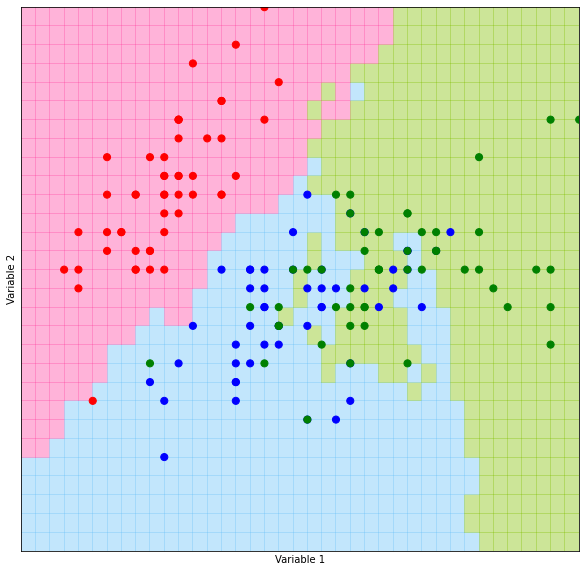

In [196]:
k = 5
filename = "iris_grid.pdf"
limits = (4,8,1.5,4.5)
h = 0.1
(xx,yy,prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h ,k)
plot_prediction_grid(xx,yy,prediction_grid, filename)

In [197]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

In [198]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

In [199]:
my_predictions.shape

(150,)

In [202]:
100*np.mean(sk_predictions == my_predictions)

96.0

In [203]:
100*np.mean(sk_predictions == outcomes)

83.33333333333334

In [204]:
100*np.mean(my_predictions == outcomes)

84.66666666666667

In [2]:
from sklearn import datasets

In [8]:
?datasets